In [5]:
from tensorflow.keras.layers import Input,Dense,Flatten,Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob


In [6]:
IMAGE_SIZE=[224,224]
train_path=os.listdir('C:\\Users\\KUMAR HIREMATH\\Downloads\\Dataset\\Train')
valid_path=os.listdir('C:\\Users\\KUMAR HIREMATH\\Downloads\\Dataset\\Test')

In [7]:
vgg=VGG19(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

80142336/80134624 [==============================] - 39s 0us/step


In [10]:
for layer in vgg.layers:
    layer.trainable=False

In [11]:
folder=glob('C:\\Users\\KUMAR HIREMATH\\Downloads\\Dataset\\Train\\*')

In [12]:
folder

['C:\\Users\\KUMAR HIREMATH\\Downloads\\Dataset\\Train\\Parasite',
 'C:\\Users\\KUMAR HIREMATH\\Downloads\\Dataset\\Train\\Uninfected']

In [13]:
x=Flatten()(vgg.output)

In [16]:
prediction=Dense(len(folder),activation='softmax')(x)

In [17]:
model=Model(inputs=vgg.input,outputs=prediction)

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [20]:
model.compile(
loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    
)

In [22]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [23]:
train_set=train_datagen.flow_from_directory('C:\\Users\\KUMAR HIREMATH\\Downloads\\Dataset\\Train',
                                           batch_size=32,
                                           target_size=(224,224),
                                           class_mode='categorical')

Found 416 images belonging to 2 classes.


In [24]:
test_set=test_datagen.flow_from_directory('C:\\Users\\KUMAR HIREMATH\\Downloads\\Dataset\\Test',
                                         batch_size=32,
                                         target_size=(224,224),
                                         class_mode='categorical')

Found 134 images belonging to 2 classes.


In [26]:
r=model.fit_generator(
train_set,
validation_data=test_set,
epochs=5,
steps_per_epoch=len(train_set),
validation_steps=len(test_set))

C:\Users\KUMAR HIREMATH\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
13/13 [==============================] - 129s 10s/step - loss: 1.6301 - accuracy: 0.5225 - val_loss: 0.8263 - val_accuracy: 0.6791
Epoch 2/5
13/13 [==============================] - 136s 11s/step - loss: 0.8490 - accuracy: 0.5689 - val_loss: 1.4424 - val_accuracy: 0.4030
Epoch 3/5
13/13 [==============================] - 130s 10s/step - loss: 0.6027 - accuracy: 0.7206 - val_loss: 0.6579 - val_accuracy: 0.6418
Epoch 4/5
13/13 [==============================] - 127s 10s/step - loss: 0.4478 - accuracy: 0.7881 - val_loss: 0.4297 - val_accuracy: 0.7761
Epoch 5/5
13/13 [==============================] - 128s 10s/step - loss: 0.3106 - accuracy: 0.8849 - val_loss: 0.4540 - val_accuracy: 0.7836


In [27]:
r.history

{'loss': [1.536507248878479,
  0.7833508253097534,
  0.5490292310714722,
  0.40291693806648254,
  0.29090386629104614],
 'accuracy': [0.536057710647583,
  0.6105769276618958,
  0.7475961446762085,
  0.8149038553237915,
  0.8942307829856873],
 'val_loss': [0.8263412714004517,
  1.4424173831939697,
  0.6579119563102722,
  0.4296862483024597,
  0.45397260785102844],
 'val_accuracy': [0.6791045069694519,
  0.4029850661754608,
  0.641791045665741,
  0.7761194109916687,
  0.7835820913314819]}

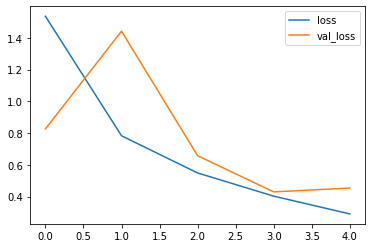

In [28]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

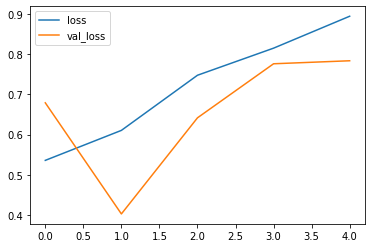

In [29]:
plt.plot(r.history['accuracy'],label='loss')
plt.plot(r.history['val_accuracy'],label='val_loss')
plt.legend()
plt.show()